# 201A November 20th

# jiying guo

# 1 Simulation of Markov Process

## a

In [5]:
P = [[0.2, 0.7, 0.1],
     [0.2, 0.5, 0.3], 
     [0.2, 0.4, 0.4]]

## b

In [11]:
import numpy as np
X0 = 1

n = 10

current = X0
realization = [current]

for _ in range(n):
    current = np.random.choice([0, 1, 2], p=P[current])
    realization.append(current+1)

print("Simulated realization of the Markov Chain:", realization)

Simulated realization of the Markov Chain: [1, 1, 2, 1, 2, 1, 2, 3, 3, 1, 2]


# 2 Stationary Distribution

## a

$$
\mathbf{P^T} = \begin{bmatrix}
0.2 & 0.2 & 0.2 \\
0.7 & 0.5 & 0.4 \\
0.1 & 0.3 & 0.4
\end{bmatrix}
$$

$$P^T\pi = \pi$$
$$(P^T-I)\pi = 0$$

$$
\left(
\begin{bmatrix}
0.2 & 0.2 & 0.2 \\
0.7 & 0.5 & 0.4 \\
0.1 & 0.3 & 0.4
\end{bmatrix}
-
\begin{bmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{bmatrix}
\right)
*
\begin{bmatrix}
\pi_1\\
\pi_2 \\
\pi_3
\end{bmatrix}
=
\begin{bmatrix}
0\\
0\\
0
\end{bmatrix}
$$

$$
\begin{bmatrix}
-0.8 & 0.2 & 0.2 \\
0.7 & -0.5 & 0.4 \\
0.1 & 0.3 & -0.6
\end{bmatrix}
*
\begin{bmatrix}
\pi_1\\
\pi_2 \\
\pi_3
\end{bmatrix}
=
\begin{bmatrix}
0\\
0\\
0
\end{bmatrix}
$$

Also, we have $\pi_1+\pi_2+\pi_3=1$\
then,\
$$
\boldsymbol{\pi}^T=\begin{bmatrix}
\frac{1}{5} & \frac{23}{45} & \frac{13}{45}
\end{bmatrix}
$$

It satisfies $\pi^T*P=\pi^T$

In [15]:
import numpy as np

P_T = np.array(P).T

I = np.identity(3)

#(P_T - I) * pi = 0
eigenvalues, eigenvectors = np.linalg.eig(P_T - I)


In [22]:
for i in range(len(eigenvalues)):
    if abs(eigenvalues[i]) <= 1e-9:
        x = eigenvectors[:,i]/sum(eigenvectors[:,i])
print("the stationary state of the process is : ",x)

the stationary state of the process is :  [0.2        0.51111111 0.28888889]


## b

In [103]:
import numpy as np
import matplotlib.pyplot as plt

n = 10
p_n = np.array(P).copy()

pi_0 = np.array([0.1, 0.5, 0.4])

pi_1 = np.array([0.3, 0.4, 0.3])

pi_2 = np.array([0.4, 0.3, 0.3])


def pin(pi_0,p_n):
    
    pi_n_T = pi_0.copy()
    pi_n = pi_n_T.T
    pi = [pi_n]
    diff = [np.linalg.norm(pi_n - x)**2]

    for i in range(1,n):
        pi_n = pi_n_T.T
        pi_n_T = pi_n.T @ p_n
        p_n = p_n @ P
        pi.append(pi_n.T)
        diff.append(np.linalg.norm(pi_n_T - x)**2)
        
    return pi, diff

res1 = pin(pi_0,p_n)
res2 = pin(pi_1,p_n)
res3 = pin(pi_2,p_n)

In [107]:
print("result 1 is : ", res1[0][-1])
print("result 2 is : ", res2[0][-1])
print("result 3 is : ", res3[0][-1])
print("the stationary state is : ", x)

result 1 is :  [0.2        0.51111111 0.28888889]
result 2 is :  [0.2        0.51111111 0.28888889]
result 3 is :  [0.2        0.51111111 0.28888889]
the stationary state is :  [0.2        0.51111111 0.28888889]


the result above is the last one of the result. \
And from the result we can see they are all the same, so this means that $\pi_i \rightarrow \pi_{\infty}$

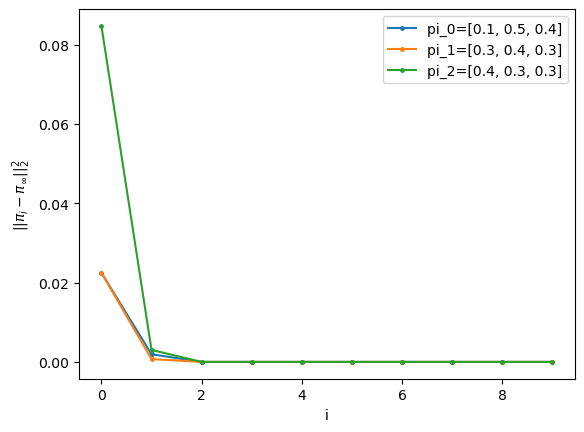

In [109]:
plt.plot(np.arange(0, n), res1[1], marker = ".", markersize = 5, \
         label = 'pi_0=[0.1, 0.5, 0.4]')
plt.plot(np.arange(0, n), res2[1], marker = ".", markersize = 5, \
         label = 'pi_1=[0.3, 0.4, 0.3]')
plt.plot(np.arange(0, n), res3[1], marker = ".", markersize = 5,\
         label = 'pi_2=[0.4, 0.3, 0.3]')
plt.xlabel("i")
plt.ylabel("$|| \pi_i-\pi_{\infty}|| _2 ^2$")
plt.legend()
plt.show()

this graph is showing with three different initial conditions $\pi_0$, $|| \pi_0-\pi_{\infty}|| _2 ^2$ is going to be 0

# 3 Absorbing state

## a

In [142]:
def waittime(n, x0):
    wt = 0
    current = x0 - 1
    for _ in range(n):
        current = np.random.choice([0, 1, 2], p=P[current])
        wt += 1
        if current + 1 == 3:
            break
    return wt

res = []
n = 500
x0 = 1
for _ in range(n):
    r0 = waittime(n, x0)
    res.append(r0)

res1 = []
x0 = 2
for _ in range(n):
    r0 = waittime(n, x0)
    res1.append(r0)

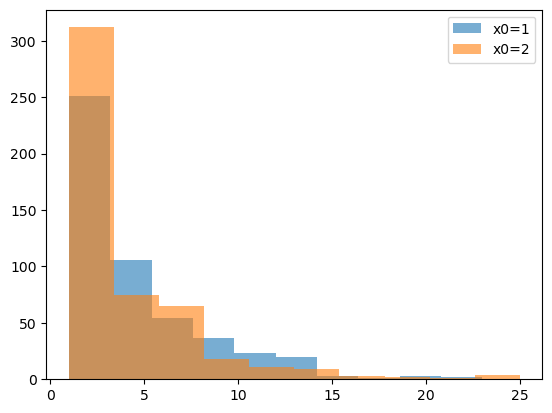

In [150]:
import matplotlib.pyplot as plt
plt.hist(res, alpha = 0.6, label = 'x0=1')
plt.hist(res1, alpha = 0.6, label = 'x0=2')
plt.legend()

In [144]:
print("when x0 = 1, the mean of arrival time is ", np.mean(res))
print("when x0 = 2, the mean of arrival time is ", np.mean(res1))

when x0 = 1, the mean of arrival time is  4.656
when x0 = 2, the mean of arrival time is  3.886


## b

since we have \
$\mu_i = 1 + \sum_{j=1}^{3} p_{ij} \mu_j$ \
with $T_3 = 0$ and $\mu_i = E[T_i]$ \
we have \
$\mu_1 = 1 + 0.2\mu_1 + 0.7\mu_2 + 0.1\mu_3$ \
$\mu_2 = 1 + 0.2\mu_1 + 0.5\mu_2 + 0.3\mu_3$ \
$\mu_3 = 0$ \
then the solution will be\
$\mu_1 = \frac{60}{13},\mu_2 = \frac{50}{13},\mu_3 = 0$

In [145]:
import numpy as np
A = np.array([[0.8, -0.7, -0.1], [-0.2, 0.5, -0.3], [0, 0, 1]])
b = np.array([1, 1, 0])

miu = np.linalg.solve(A, b)
print(miu)

[4.61538462 3.84615385 0.        ]


Compared this solution with the result in part a

In [149]:
print("result in part a")
print("when x0 = 1: ", np.mean(res))
print("when x0 = 2: ", np.mean(res1))

result in part a
when x0 = 1:  4.656
when x0 = 2:  3.886


we can see they are almost the same